# Introduction

It has always been a dream of mankind to create artificial intelligence, i.e. non-human entities which are able to perform or outperform human beings. It is not so clear what this means: is it just to calculate quicker? Or to play certain games more successfully by using algorithms? Or to learn playing games even without having certain algorithms or human expert knowledge being programmed? Or to enter the very heart of human creative activities (speaking to each other, writing books, composing music, investing money, etc) and producing work which is indistinguishable from human beings?

This reminds us the [Turing test](https://en.wikipedia.org/wiki/Turing_test#Standard_interpretation): can one distinguish machines from human beings doing certain tasks in a blind observation.

It is not so simple to pass the Turing test as first artificial intelligence communicators show: [ELIZA](https://www.masswerk.at/elizabot/eliza.html). Still it is fun and relaxing to chat a bit with Eliza.

If Eliza were the peak of artificial intelligence, would you trust your money, your future pension, your banking environment to her, or would you rather believe that she can be outperformed?

We have, however, recently seen some spectacular successes by machine learning techniques in areas like
1. Artificial communicators: [Google Duplex](https://www.youtube.com/watch?v=D5VN56jQMWM)
2. Artificial Players: [AlphaGo](https://www.youtube.com/watch?v=8dMFJpEGNLQ)
3. Artificial Composers: [Schubert's unfinished symphony](https://www.youtube.com/watch?v=GcFkoTUraMM)
4. Artificial Writers: [Open AI](https://www.theguardian.com/technology/2019/feb/14/elon-musk-backed-ai-writes-convincing-news-fiction)

Here we definitively come closer to machines passing Turing tests, to machines outperforming human beings in core human activities, maybe also in investing money ... ?

Several aspects make this renaissance of artificial intelligence possible: why renaissance? Because artifical intelligence as a scientific discipline has also experienced [AI winters](https://en.wikipedia.org/wiki/AI_winter)
1. Computing power has evolved tremendously.
2. The mathematical theory of learning has developed many tools.
3. Techonology is nowadays very accessible.
4. Convincing breakthroughs have been achieved in image recognition, natural languages, games, music, etc.

Look for instance at the following simple task of recognizing handwritten digits, which is learned by a tabula rasa machine. Notice the simplicity of the code and its accessibility.

In [1]:
import numpy as np
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

/usr/local64.hg/app/python/3.6.8-3.fc28.rpm-20190521/usr/lib64/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


8


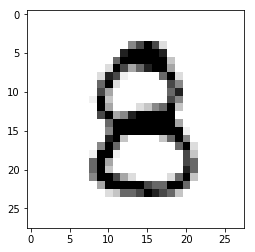

In [3]:
import matplotlib.pyplot as plt
#matplotlib inline # Only use this if using iPython
image_index = np.random.randint(60000) #7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is printed
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [183]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
y_train.shape

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


(60000,)

In [187]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
layer1=Conv2D(28, kernel_size=(3,3), input_shape=input_shape)
layer1.trainable=True
model.add(layer1) # (3,3) for mnist
model.add(MaxPooling2D(pool_size=(2, 2))) # (2,2) for mnist
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
layer2 = Dense(128, activation=tf.nn.relu,kernel_initializer='random_uniform')#glorot_uniform is by default
layer2.trainable=True#False
model.add(layer2)
#layer3 = Dense(2*128, activation=tf.nn.relu,kernel_initializer='random_uniform')
#layer3.trainable=False
#model.add(layer3)
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [188]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 4732)              0         
_________________________________________________________________
dense_86 (Dense)             (None, 128)               605824    
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
for i in range(1):
    model.fit(x=x_train,y=y_train, epochs=1)
    x = model.evaluate(x_test, y_test)
    print('\n',x)

Epoch 1/1
 9888/10000 [============================>.] - ETA: 0s
 [0.08093519524633884, 0.9733]


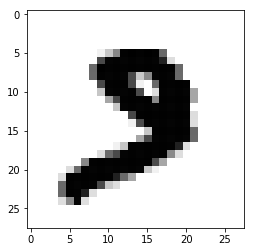

Prediction 3
Grand Truth 9
0.01


In [131]:
img_rows=28
img_cols=28
count = 0
for i in range(100):
    image_index = np.random.randint(10000)
    pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
    if pred.argmax() != y_test[image_index]:
        plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
        plt.show()
        print('Prediction',pred.argmax())
        print('Grand Truth',y_test[image_index])
        count = count + 1
        #break
print(count/100)

What happened here? It is as simple as fascinating.

A parametrized family of functions (a so called neural network) has been constructed. The functions take as input the picture of the handwritten digits (28 times 28 pixels) and produce an output which corresponds to its value. The parameters of the function are trained on 60000 training pictures and then tested on 10000 test pictures.

In [67]:
model.count_params()

607394

An amazing amount of 607394 parameters is trained ... 

Or look at the following task which is less accessible for human beings but more important in investment universes.

In [68]:
x_trainlr = np.load('x_trainlr.npy')
y_trainlr = np.load('y_trainlr.npy')
x_testlr = np.load('x_testlr.npy')
y_testlr = np.load('y_testlr.npy')

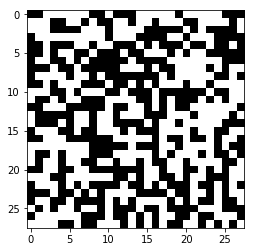

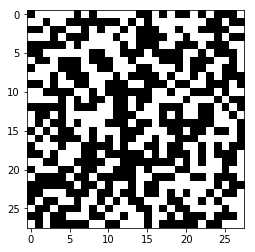

In [69]:
plt.imshow(x_trainlr[3000].reshape(28, 28),cmap='Greys')
plt.show()
plt.imshow(x_trainlr[33000].reshape(28, 28),cmap='Greys')
plt.show()

In [153]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
modellr = Sequential()
modellr.add(Conv2D(28, kernel_size=(1,10), input_shape=input_shape)) # (3,3) for mnist
modellr.add(MaxPooling2D(pool_size=(1, 7))) # (2,2) for mnist
modellr.add(Flatten()) # Flattening the 2D arrays for fully connected layers
modellr.add(Dense(128, activation=tf.nn.relu))
modellr.add(Dense(128, activation=tf.nn.relu))
modellr.add(Dropout(0.1))
modellr.add(Dense(2,activation=tf.nn.softmax))

In [154]:
modellr.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
for i in range(5):
    modellr.fit(x=x_trainlr,y=y_trainlr, epochs=1)
    x = modellr.evaluate(x_testlr, y_testlr)
    print('\n',x)

Epoch 1/1
 9920/10000 [============================>.] - ETA: 0s
 [0.5010306933403015, 0.7484]
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0s
 [0.44502502093315127, 0.7844]
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0s
 [0.4896464219093323, 0.7689]
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0s
 [0.525030509185791, 0.7673]
Epoch 1/1
10000/10000 [==============================] - 1s     

 [0.5767976376533508, 0.7625]


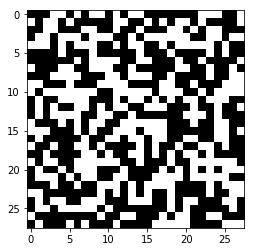

Prediction 1
Grand Truth 0


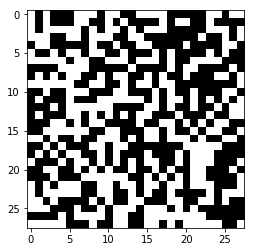

Prediction 1
Grand Truth 0


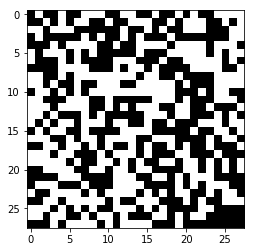

Prediction 1
Grand Truth 0


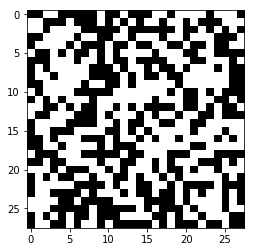

Prediction 0
Grand Truth 1


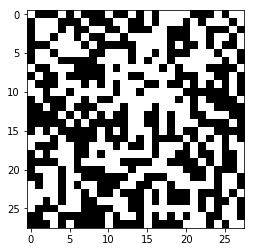

Prediction 1
Grand Truth 0


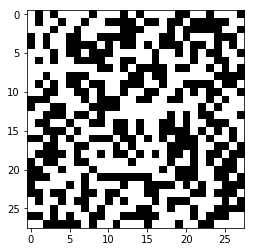

Prediction 1
Grand Truth 0


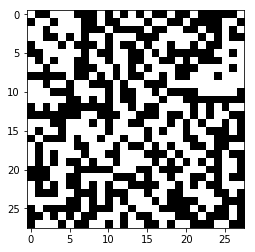

Prediction 1
Grand Truth 0


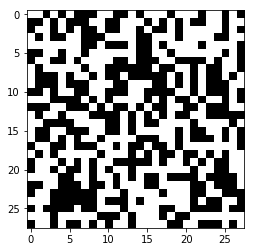

Prediction 1
Grand Truth 0


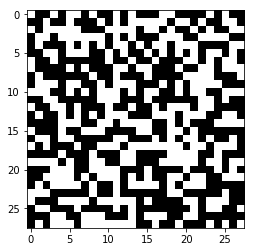

Prediction 0
Grand Truth 1


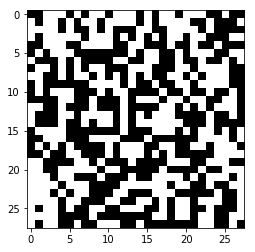

Prediction 0
Grand Truth 1


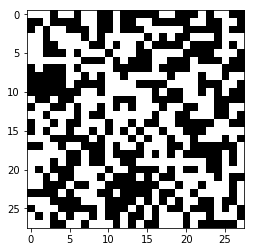

Prediction 1
Grand Truth 0


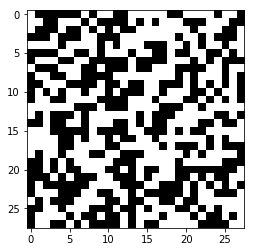

Prediction 1
Grand Truth 0


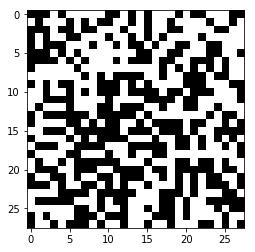

Prediction 1
Grand Truth 0


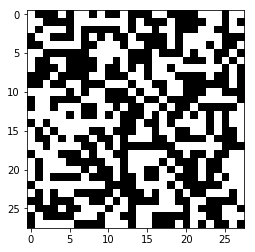

Prediction 1
Grand Truth 0


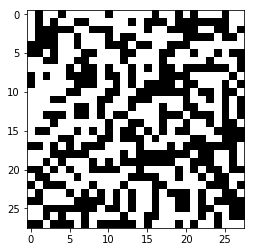

Prediction 0
Grand Truth 1


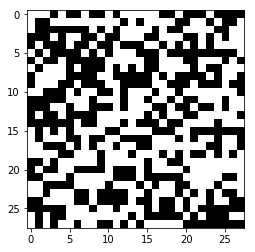

Prediction 1
Grand Truth 0


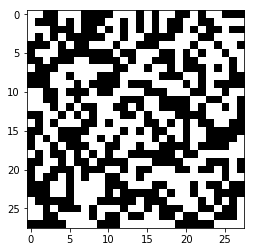

Prediction 1
Grand Truth 0


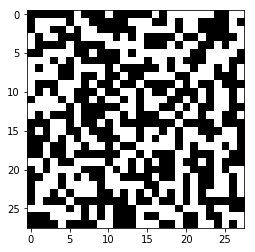

Prediction 1
Grand Truth 0


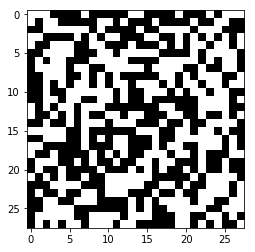

Prediction 0
Grand Truth 1


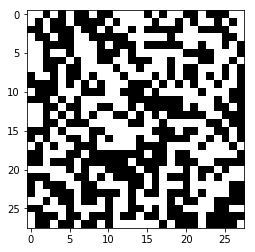

Prediction 0
Grand Truth 1


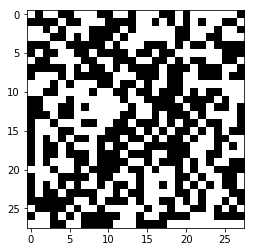

Prediction 1
Grand Truth 0


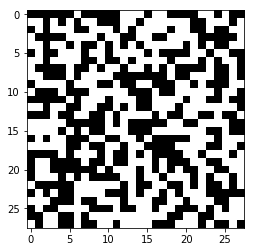

Prediction 1
Grand Truth 0


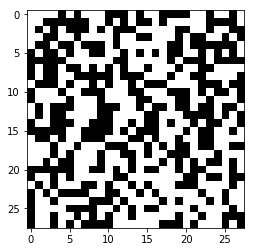

Prediction 1
Grand Truth 0


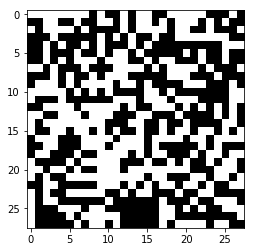

Prediction 1
Grand Truth 0


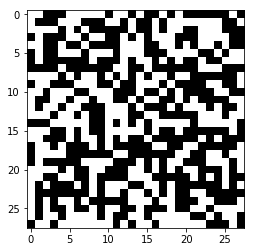

Prediction 0
Grand Truth 1
0.25


In [155]:
img_rows=28
img_cols=28
count = 0
for i in range(100):
    image_index = np.random.randint(10000)
    pred = modellr.predict(x_testlr[image_index].reshape(1, img_rows, img_cols, 1))
    if pred.argmax() != y_testlr[image_index]:
        plt.imshow(x_testlr[image_index].reshape(28, 28),cmap='Greys')
        plt.show()
        print('Prediction',pred.argmax())
        print('Grand Truth',y_testlr[image_index])
        count = count + 1
        #break
print(count/100)

The above pictures are just graphical representations (aligned in a matrix) of 28 times 28 randomly or fake randomly drawn numbers 0 or 1. The faking mechanisms is detected by our machine with a success rate of 72 percent.

In [75]:
def longestrun(Xrand):
    walk = np.cumsum(2*Xrand-1)
    y = 1
    for i in range(2,20):
        for n in range(len(walk)-i):
            if abs(walk[n+i]-walk[n])==i:
                y = i
                break
    return y

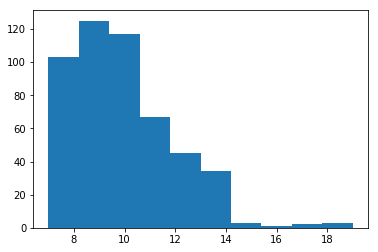

[1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0
 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1
 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 

In [76]:
def histlongestrun(N,M):
    lrts = []
    for i in range(M):
        draw = np.random.binomial(1,0.5,N*N)
        lr = longestrun(draw)
        lrts = lrts + [lr]
    plt.hist(lrts)
    plt.show()
histlongestrun(28,500)
draw = np.random.binomial(1,0.5,28*28)
print(draw)
print(longestrun(draw))

In [77]:
modellr.count_params()

201527

The nature of randomness is very structured and our tabula rasa machine can alreay quite well understand the difference.

Or we can try to predict asset price behavior. We can incode this into a game.

We throw two dices five times (two independent sources of randomness). A token is moving according to the results of the dices and according to an *unknown* law (which only depends on the current place). By observing the game for some time one should understand how to predict ...

In [79]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

d=2
M=30 

def canonical(i,M):
    e = np.zeros((M,1))
    e[i,0]=1.0
    return e

def vectorfield2d(state,increment):
    return np.array([(5.0*np.sqrt(state[1]**2))**0.7,0.3*state[1]])*increment[0]+np.array([(1.0*np.sqrt(state[1]**2))**0.7,1.0*state[1]])*increment[1]

def randomAbeta(d,M):
    A = []
    beta = []
    for i in range(d):
        B = np.random.normal(0.0,0.5,size=(M,M))
        B = np.random.permutation(B)
        A = A + [B]
        beta = beta + [canonical(i,M)+np.random.normal(0.0,0.1,size=(M,1))]
    return [A,beta]

Abeta = randomAbeta(d,M)
A = Abeta[0]
beta = Abeta[1]

def sigmoid(x):
    return np.tanh(x)

def reservoirfield(state,increment):
    value = np.zeros((M,1))
    for i in range(d):
        value = value + sigmoid(np.matmul(A[i],state) + beta[i])*increment[i]
    return value

In [80]:
class SDE:
    def __init__(self,timehorizon,initialvalue,dimension,dimensionBM,dimensionR,vectorfield,timesteps,):
        self.timehorizon = timehorizon
        self.initialvalue = initialvalue # np array
        self.dimension = dimension
        self.dimensionBM = dimensionBM
        self.dimensionR = dimensionR
        self.vectorfield = vectorfield
        self.timesteps = timesteps

    def path(self):
        BMpath = [np.zeros(self.dimensionBM)]
        SDEpath = [np.array([1.0, self.initialvalue])]
        
        for i in range(self.timesteps):
            helper = np.sqrt(self.timehorizon/self.timesteps)*(np.random.randint(-2,4,self.dimensionBM)-3/6)/np.sqrt(19/6)
            BMpath = BMpath + [BMpath[-1]+helper]
            SDEpath = SDEpath + [(SDEpath[-1]+self.vectorfield(SDEpath[-1],helper))]
            #np.ones(self.dimensionBM)*self.timehorizon/self.timesteps
        return [BMpath, SDEpath]
        
    def reservoir(self,BMpath):
        reservoirpath = [canonical(0,self.dimensionR)*self.initialvalue]
        for i in range(self.timesteps):
            increment = BMpath[i+1]-BMpath[i]
            reservoirpath = reservoirpath + [np.exp(-0.2*self.timehorizon/self.timesteps)*(reservoirpath[-1]+reservoirfield(reservoirpath[-1],increment))]
        return reservoirpath    

In [89]:
Game = SDE(1,1.0,2,d,M,vectorfield2d,10000)
training = Game.path()

In [90]:
BMpath=training[0]
Y = training[1]
Ydata = np.squeeze(Y)
Ydatadiff = np.diff(Ydata,axis=0)
Ytrain = np.concatenate((Ydata[:1000],Ydatadiff[:1000:1]),axis=0)
np.shape(Ytrain)

(2000, 2)

In [91]:
X=Game.reservoir(BMpath)
np.shape(X)
Xdata = np.squeeze(X)
Xdatadiff = np.diff(Xdata,axis=0)
Xtrain=np.concatenate((Xdata[:1000],Xdatadiff[:1000:1]),axis=0)
np.shape(Xtrain)

(2000, 30)

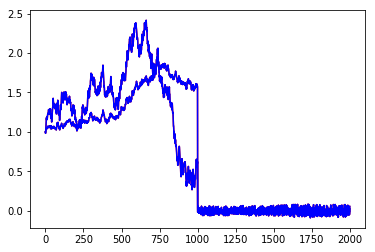

array([[ 1.00007742,  1.40555855,  1.29248913, -0.65250517, -0.04872096,
        -0.22533942, -1.81449724, -1.00725761,  0.59383689, -0.31728096,
         0.45195022,  1.26742775, -0.11309925, -0.23920377,  0.31127225,
        -0.86211167,  1.17015998,  0.29360029,  0.60496026, -0.2692004 ,
        -0.35098848,  0.61568122, -0.65398973, -0.34246955,  0.26692739,
        -0.51020895, -0.16093013, -0.16426014, -0.80049429, -0.32827308],
       [ 1.00038069,  0.40529793,  1.41854304,  0.48752566,  0.02400001,
         0.89316778,  1.14170356,  0.0119457 ,  0.48049085, -0.05616884,
         1.38400335,  0.74703812, -0.19348471,  0.83266988,  0.7840968 ,
         0.18658821, -0.1290385 , -0.04406387,  0.69602349,  1.07335673,
         0.42368715,  1.02010113, -2.18517691,  0.09225776,  0.8373396 ,
        -1.02548373, -0.21731557, -0.36139092, -0.91983584, -0.33026363]])

In [92]:
from sklearn import linear_model
import pandas as pd
lm = linear_model.LinearRegression()
modelR = lm.fit(Xtrain,Ytrain)
plt.plot(modelR.predict(Xtrain),'r')
plt.plot(Ytrain,'b')
plt.show()
modelR.score(Xtrain,Ytrain)
modelR.coef_

In [93]:
generalization = Game.path()
BMpath = generalization[0]
Y = generalization[1]
Ydata = np.squeeze(Y)

[4. 5. 1. 1. 2. 5. 5. 5. 3. 2.]
[1. 3. 1. 6. 1. 3. 4. 4. 3. 6.]


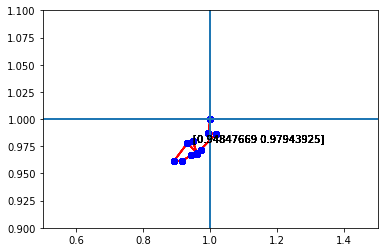

In [94]:
k=10
Z = np.squeeze(BMpath)
returns = np.diff(Z,axis=0)*np.sqrt(19/6)*np.sqrt(10000)+3/6+3
for i in range(2):
    print(returns[0:k,i])

X = Game.reservoir(BMpath)
Xdata = np.squeeze(X)
for i in range(k):
    plt.plot(Ydata[0:k+1][:,0],Ydata[0:k+1][:,1],zorder=1,c='r')
    plt.scatter(Ydata[0:k+1][:,0],Ydata[0:k+1][:,1],zorder=2,c='b')
    plt.annotate(Ydata[k],Ydata[k])
    plt.xlim(0.5,1.5)
    plt.ylim(0.9,1.1)
    plt.axvline(x=1.0)
    plt.axhline(y=1.0)
plt.show()

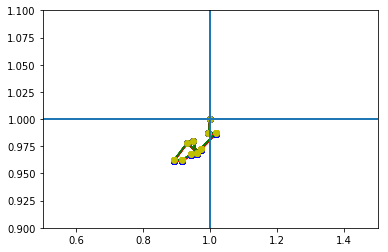

In [95]:
for i in range(k):
    plt.plot(Ydata[:k+1][:,0],Ydata[:k+1][:,1],zorder=1,c='r')
    plt.scatter(Ydata[:k+1][:,0],Ydata[:k+1][:,1],zorder=2,c='b')
    plt.plot(modelR.predict(Xdata[:k+1])[:,0],modelR.predict(Xdata[:k+1])[:,1],zorder=1,c='g')
    plt.scatter(modelR.predict(Xdata[:k+1])[:,0],modelR.predict(Xdata[:k+1])[:,1],zorder=2,c='y')
    plt.xlim(0.5,1.5)
    plt.ylim(0.9,1.1)
    plt.axvline(x=1.0)
    plt.axhline(y=1.0)
plt.show()

Here training was much quicker since we encode information of the training set so well that actually only a regression was necessary to *store* the observations' information. Such a market simulator is of course useful ... 

What is common to all three examples?

1. Learning from actual observations.
2. Before learning some general knowledge of the problem ('rules of the game') but no particularities are known.
3. Learning is accessible.

It is the goal of this lecture to explain in detail the mathematical ideas behind these phenomena and to show concrete applications to finance and economics as alluded above.

# Possible Applications in Finance

To provide ideas which applications we do have in mind. Instead of using established numerical algorithms one can *learn* solutions from observations.

1. Deep Hedging (B&uuml;hler-Gonon-Teichmann-Wood 2017)
2. Deep Calibration (Cuchiero-Teichmann et al. 2016-17-18)
3. Deep Simulation (Cuchiero-Gonon-Grigoryeva-Ortega 2019)

What is Hedging? Solutions of non-linear, non-standard optimization problems.

What is Calibration? Model selection given certain market data.

What is simulation? Prediction of time series.

All tasks of tremendous importance in every day finance.

# Universal Approximation

Neural networks appeard in the 1943 seminal work by [Warren McCulloch](https://de.wikipedia.org/wiki/Warren_McCulloch) and [Walter Pitts](https://de.wikipedia.org/wiki/Warren_McCulloch) inspired by certain functionalities of the human brain aiming for artificial intelligence (AI). Essentially neural networks are concatenations of affine functions with standard non-linearities, the essential feature is *one-dimensionality* of involved maps (except the sum), which is related to

>[Arnold](https://en.wikipedia.org/wiki/Vladimir_Arnold)-[Kolmogorov](https://en.wikipedia.org/wiki/Andrey_Kolmogorov) representation theorem (around 1960): functions on the unit cube can be represented by sums and uni-variate functions ([Hilbert's](https://en.wikipedia.org/wiki/David_Hilbert) thirteenth problem), i.e. for evey non-linear function of $d$ real variables one can finitely many functions of one real variable such that
$$
F(x_1,\ldots,x_d) = \sum_{i=0}^{2d} \phi_i \big(\sum_{j=1}^d\psi_{ij} (x_j) \big)
$$
holds true.

but also to

>the [Radon](https://en.wikipedia.org/wiki/Johann_Radon) transform (used in computer tomography) where a multivariate density is approximated by its lower dimensional projections.

At the end of the eighties it was proved by George Cybenko in 'Approximation by superposition of sigmoidal functions' and by Kurt Hornik, Maxwell Stinchcombe and Halbert White in 'Multilayer feedforward networks are universal approximator' that neural networks with only *one* hidden layer approximate certain generic classes of functions. We shall prove this theorem first and consider certain instances of it in the sequel.

What is a neural network precisely? We shall consider a very general definition here.

Let $X$ be a compact space, i.e. a compact topological Hausdorff space, and let ${(f_i)}_i$ be a family of real valued continuous functions on $X$ which generates the Borel $\sigma$-algebra and is closed under addition.

Notice that on compact spaces we can consider the space of continuous functions $ C(X) $ with the supremum norm. This provides us with a Banach space and *every* positive linear functional on this Banach space (every element of the dual space can be written as difference of positive and negative linear functionals) can be represented by a unique regular Borel measure $\mu$ on $X$, i.e.
$$
\mu(U) = \sup \{ \mu(K) | \,  \text{ for } K \subset U \text{ compact }\}
$$
for all open $U \subset X $ and
$$
\mu(E) = \inf \{ \mu(U) | \,  \text{ for }  E \subset U \text{ open }\}
$$
for all Borel sets $E$. We shall refer to such measures as Radon measures. This is called [Riesz-Markov-Kakutani representation theorem](https://en.wikipedia.org/wiki/Riesz%E2%80%93Markov%E2%80%93Kakutani_representation_theorem) or short Riesz representation theorem.

Let $ \phi : \mathbb{R} \to \mathbb{R} $ be a sigmoidal activation function, i.e. a function with $ \phi(t) \to 1 $ for $ t \to  \infty $ and $ \phi(t) \to 0 $ as $ t \to -\infty$.

>A neural network $ g $ is a linear combination of functions of type $ \phi \circ (f_i + \beta_i) $ for some number $\beta_i $, i.e
$$
g(x) = \sum_{i=1}^N  \alpha_i \phi(f_i(x)+ \beta_i) 
$$
>for $ x \in X $.
>We say that the neural network has $N$ hidden nodes and one hidden layer.

We shall also need a second definition. A locally bounded measurable function $ \phi $ is called *discriminatory* if every (signed) Radon measure $ \mu $ on $ X $ with
$$
\int_X \phi(f_i(x) + \beta_i) \mu(dx) = 0 
$$
for all $ i $ and for all $\beta_i $ it holds that the signed Radon measure $ \mu $ vanishes.

We can easily prove the following statement:

<b>Lemma:</b> Every bounded measurable sigmoidal function is discrimatory.

Let $ \phi $ a be a sigmoidal activation function and let $ \mu $ be a signed Radon measure such that
$$
\int_X \phi(f_i(x) + \beta_i) \mu(dx) = 0 
$$
for all $ i $ and $\beta_i $, then -- by assumption $ \phi(n f_i(x) + n \theta_i + \xi) $ approximates
$$
1_{\{f_i + \theta > 0 \}} +  \phi(\xi) 1_{\{f_i + \theta = 0 \}}
$$
as the integers $ n \to \infty $ for all $ x \in X$. By Lebesgue's dominated convergence theorem the signed measure $ \mu $ satisfies therefore (notice that $\xi$ is arbitrary!)
$$
\int_X 1_{\{f_i + \theta_i > 0\}} (x) \mu(dx) = 0 
$$
for all $ i $ and for all $ \theta_i $. Hence the signed Radon measure $ \mu $ vanishes on all sets of the form $ f_i + \theta_i > 0 $. 

By linear combinations and dominated convergence one obtains that
$$
\int_X h(f_i(x))\mu(dx) = 0
$$
for all continuous functions $h:\mathbb{R} \to \mathbb{R}$, since a continuous function $ h $ can be approximated pointwise by step functions.

Take now $ h(x) = \sin(x) $ or $ h(x) = \cos(x) $, then we obtain that actually
$$
\int_X \exp( \sum f_i(x) k_i ) \mu(dx) = 0
$$
for all integers $ k_i \in \mathbb{Z} $. Hence actually thec closure of the linear space generated by $ h(f_i) $ for all $ i $ and for all continuous functions $ h $ contains an algebra, e.g.
$$
\int_X f_{i_1}(x) \cdots f_{i_k}(x) \mu(dx) = 0
$$
for all $i_1,\ldots,i_k$. This, however, means that the measure $ \mu $ vanishes, since the algebra generated by the point separating function family $ (f_i) $ is dense due to the Stone-Weierstrass theorem.

By the [Hahn](https://en.wikipedia.org/wiki/Hans_Hahn_&#40;mathematician&#41;)-[Banach](https://en.wikipedia.org/wiki/Stefan_Banach) theorem and the [Riesz](https://en.wikipedia.org/wiki/Frigyes_Riesz) representation theorem it is now clear that neural networks generated with a fixed continuous bounded sigmoidal function $ \phi $ are dense in all continuous functions.

<b>Theorem: The set of one layer neural networks is dense in $C(X)$.</b>

Consider the closure of the set of all neural networks in $C(X)$ and take a contiuous linear functional $ l $ on $ C(X) $ which vanishes on it: its existence is guaranteed by the Hahn-Banach theorem. This linear functional can be represented by a Radon measure $ \mu $. Since $ l $ vanishes on all neural networks it holds in particular that
$$
\int_X \phi(f_i(x) + \beta_i) \mu(dx) = 0 
$$
for all $ i $ and for all $\beta_i $. But $ \phi $ is discrimatory, hence $ \mu = 0 $ and therefore the closure of the space of neural networks has to be $ C(X) $.

There are several remarks due:

1. Sigmoidal functions are discrimatory, but they are not the only ones. By Norbert Wiener's famous Tauberian theorem every function $ \phi \in L^1(\mathbb{R}) $ such that $ \int_{\mathbb{R}} \phi(t) dt \neq 0 $ has the property that the closure of $ \phi(a.+b) $ for all real $ a , b $ is dense in $L^1(\mathbb{R}) $ (see Walter Rudin's book on functional analysis). Other classes can be described too.

2. The argument can be generalized to $ L^p $ spaces on measure spaces, to $ B^\rho $ spaces on weithed spaces, to $ C^k $ spaces in manifolds. The essential ingredients are an additively closed, *point separating* set of functions $ f_i $ on the corresponding space and a weak topology on the respective Banach space which allows for dominated convergence and, of course, a discrimatory function for the respective linear functionals.

3. We can iterate the argument: take now the additively closed, point separating family of functions the set of neural networks with one hidden layer (written with respect to some family $ f_i $ itself, then we obtain neural networks with *two* hidden layers. We have therefore actually proved that neural networks with finitely many hidden layers are dense in $C(X)$.

# Deep neural networks

Neural networks with one hidden layer are called *shallow*, with more than one *deep*. The number of nodes in the hidden layer can vary as well as the discrimatory function.

Before we talk about the most important question how to actually train a network, i.e. determine the network which approximates well a given function on a trainings set, we try to understand first what we can in principle expect.

What shall give a series of arguments why deep neural networks represent so well non-linear functions following the famous article [Provable approximations for deep neural networks](https://arxiv.org/pdf/1509.07385.pdf) by Uri Shaham, Alexander Cloninger and Ronald R. Coifman.

The main statement of the article is in fact amazing:

<b>$L^2$ functions with sparse wavelet expansion on $d$ dimensional manifolds $\Gamma \subset \mathbb{R}^m$ can be approximated by depth $3$ sparsely connected neural networks with $N$ units up to order $ 1/N $. Constants mainly depend on $ d $ and only weakly on $m$. </b>

>Classical work by Barron suggests actually such a relationship by functional analytic arguments. However constants there grow with dimension $m$.

The most important insight is the following construction:

Take a rectifier activation function $ r(x) = \max(x,0) $ and define a trapezoid shaped function
$$
t(x) = r(x+3) - r(x+1) - r(x-1) + r(x-3)
$$

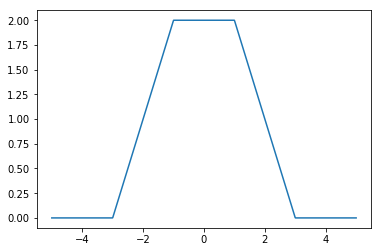

In [186]:
def r(x):
    return np.max([x,0])

def t(x):
    return r(x+3)-r(x+1)-r(x-1)+r(x-3)

x = np.linspace(-5,5,1000)
y = np.array([t(z) for z in x])
plt.plot(x,y)
plt.show()

Next we define the scaling function
$$
\phi(x_1,\ldots,x_d) = C_d r \big (\sum_{i=1}^d t(x_i) - 2(d-1) \big)
$$
which is already neural network of depth $2$ with a constant chosen such that $ \int \phi(x) dx = 1 $.

This function $ \phi $ is used to define wavelets and so called frames, which serve to expand the non-linear function $ f $, via $ S_{-1} := 0 $.
$$
S_k(x,b) := 2^k \phi (2^{k/d}(x-b))
$$
for $ k \in \mathbb{N} $, the 'father' wavelet, and
$$
D_k(x,b) := S_k(x,b) - S_{k-1}(x,b)
$$
as well as $ \psi_k(x) := 2^{-k/2} D_k(x,b) $, the 'mother' wavelet.

Then $ \{ \psi_k(.,b) \} $ for $ k \in \mathbb{Z} $ and $ b \in 2^{-k} \mathbb{Z}^d $ is a frame in $ L^2(\mathbb{R}^d) $.

<b>Let $ f $ be a compactly supported function on $ \mathbb{R}^d $ with bounded gradient, then for every $ K \in \mathbb{N} $ there is a linear combination $ f_K $ of frame elements up to order $ K $ such
$$
\big|f(x) - f_K(x) \big| = O\big(2^{-2K/d}\big) \, .
$$
</b>

Whence one can approximate the function $ f $ by neural networks of depth $2$ build by rectifier units.

This can apparently be extended to manifolds by localizing to charts.